In [1]:
from functions.crop_image import random_crop
from functions.load_training_data import training_samples
from skimage import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

# Load training samples

In [2]:
training_samples, training_labels = training_samples(1000, [1,1,1,1])
training_samples[0].shape

(64, 64, 3)

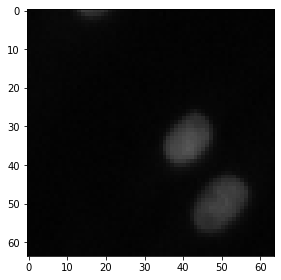

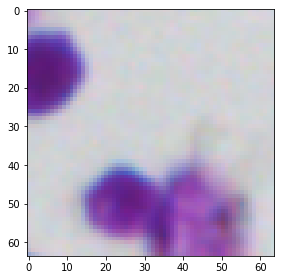

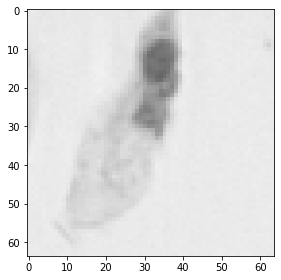

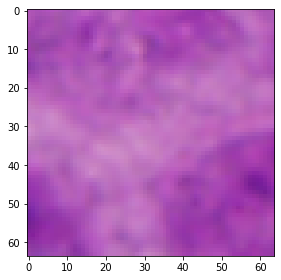

<Figure size 432x288 with 0 Axes>

In [3]:
count = 0
for i in training_samples:
    io.imshow(i)
    plt.figure()

    if count == 3: 
        break
    
    count += 1

# Configure GPU for training

In [4]:
from functions.tf_config import config_gpu

config_gpu(5, True)

8 Physical GPUs, 1 Logical GPU
Configured to run on GPU 5


# Create model
* be sure that final dense layer reflects the number of categories we're training for

In [5]:
from tensorflow import keras
model = keras.models.Sequential([
    keras.layers.Conv2D(32, 3, input_shape=(64, 64, 3), activation='relu', strides=(2,2)),
    keras.layers.Conv2D(16, 3, activation='relu', strides=(2,2)),
    keras.layers.Conv2D(8, 3, activation='relu', strides=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(4)
])

In [6]:
predictions = model(training_samples).numpy()
predictions

array([[ 0.00668853, -0.00099949, -0.00679704, -0.01027321],
       [ 0.07995868,  0.00220452, -0.12676057, -0.07013362],
       [ 0.09358621,  0.00415155, -0.14192888, -0.0794836 ],
       ...,
       [ 0.06908879,  0.01909503, -0.12427455, -0.05542798],
       [ 0.09605369,  0.01578557, -0.1360054 , -0.07732465],
       [ 0.10432354,  0.02614441, -0.09614423, -0.06560269]],
      dtype=float32)

In [7]:
tf.nn.softmax(predictions).numpy()

array([[0.25238964, 0.25045672, 0.24900886, 0.24814476],
       [0.27784967, 0.25706425, 0.22596067, 0.23912537],
       [0.2820325 , 0.25790405, 0.22285186, 0.23721159],
       ...,
       [0.27334794, 0.26001823, 0.22528857, 0.24134529],
       [0.2811684 , 0.25948155, 0.22293821, 0.23641184],
       [0.27879432, 0.25782865, 0.22815074, 0.23522632]], dtype=float32)

In [8]:
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
loss_fn(training_labels, predictions).numpy()

1.4202198

In [9]:
opt = keras.optimizers.Adam(learning_rate=.0001)
model.compile(optimizer=opt,
             loss=loss_fn,
             metrics=['accuracy'])

In [10]:
model.fit(training_samples, training_labels, epochs=5, validation_split=.01)

Epoch 1/5
124/124 [==============================] - 1s 7ms/step - loss: 1.0976 - accuracy: 0.5644 - val_loss: 0.6610 - val_accuracy: 0.7500
Epoch 2/5
124/124 [==============================] - 0s 3ms/step - loss: 0.3383 - accuracy: 0.9212 - val_loss: 0.1349 - val_accuracy: 0.9750
Epoch 3/5
124/124 [==============================] - 0s 3ms/step - loss: 0.1296 - accuracy: 0.9652 - val_loss: 0.0781 - val_accuracy: 0.9750
Epoch 4/5
124/124 [==============================] - 0s 3ms/step - loss: 0.1061 - accuracy: 0.9682 - val_loss: 0.0664 - val_accuracy: 0.9750
Epoch 5/5
124/124 [==============================] - 0s 3ms/step - loss: 0.0891 - accuracy: 0.9735 - val_loss: 0.0630 - val_accuracy: 0.9750


In [11]:
# use model.predict to test model
# use the trained model on a random image crop
# create an example of how to use the model once it's trained
# do the same in the regression model (with the predicted avg. size instead of color)